In [1]:
import numpy as np
import pandas as pd
import scipy
import struct 
import wave
import matplotlib.pyplot as plt

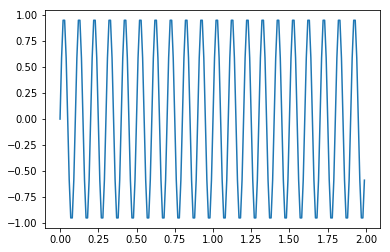

In [2]:
amp1 = 1
freq1 = 10
sampling_rate = 100 #should be atleast twice the highest frequency (i.e 440Hz see Nyquist-Shannon Theorm)
t = np.linspace(0,2,2*100, endpoint = False)
signal = amp1 * np.sin(freq1 * 2 * np.pi * t)
plt.plot(t, signal)
plt.show()

In [3]:
#Applying Fourier transform
w = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(w))
#print(freqs.min(), freqs.max()) # Will always be in a range [-0.5 0.5)
plt.plot(freqs,abs(w))

# Find the peak in the coefficients
idx = np.argmax(np.abs(w))
freq = freqs[idx]
freq_in_hertz = abs(freq * sampling_rate)
print('Highest frequency observed is:', freq_in_hertz, 'Hz')

Highest frequency observed is: 10.0 Hz


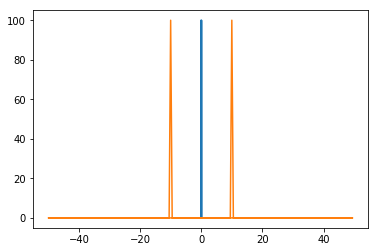

In [4]:
# Frequency on xaxis is not correct since I didn't account for sampling rate
# Correcting frequency and amplitute (see concept of leakage)
new_freqs = freqs * sampling_rate
plt.plot(new_freqs, np.abs(w) )
plt.show()

4073472
(4073472,)
Audio length: 92.37 seconds


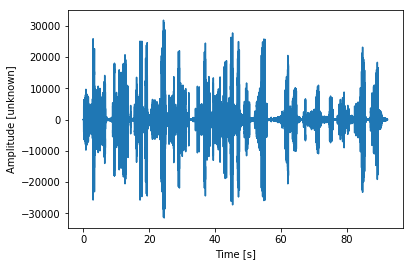

In [22]:
from scipy.io import wavfile
rate, audio = wavfile.read('C://Users//Furqan//Downloads//melody.wav')
audio = np.mean(audio, axis=1)
print(len(audio))
print(audio.shape)
N = audio.shape[0]
L = N / rate
print(f'Audio length: {L:.2f} seconds')

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]')
plt.show()

In [12]:
from skimage import util
M = 1024
slices = util.view_as_windows(audio, window_shape=(M,), step=100)
print(f'Audio shape: {audio.shape}, Sliced audio shape: {slices.shape}')

Audio shape: (4073472,), Sliced audio shape: (40725, 1024)


In [13]:
win = np.hanning(M + 1)[:-1]
slices = slices * win

In [14]:
slices = slices.T
print('Shape of `slices`:', slices.shape)

Shape of `slices`: (1024, 40725)


In [15]:
spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


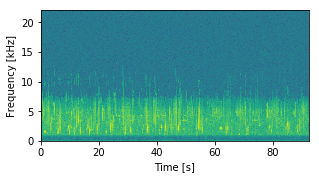

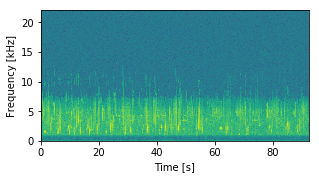

In [19]:
f, ax = plt.subplots(figsize=(4.8, 2.4))
S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))
ax.imshow(S, origin='lower', cmap='viridis',
extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


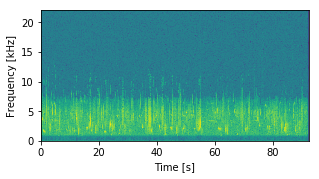

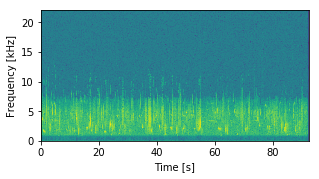

In [21]:
from scipy import signal
freqs, times, Sx = signal.spectrogram(audio, fs=rate, window='hanning',
nperseg=1024, noverlap=M - 100,
detrend=False, scaling='spectrum')
f, ax = plt.subplots(figsize=(4.8, 2.4))
ax.pcolormesh(times, freqs / 1000, 10 * np.log10(Sx), cmap='viridis')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]')
plt.show()